# Time-lapse inversion
In this notebook we will see how to use pyR2 API to do a time-lapse inversion. Let's first import some stuff.

In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import os
import sys
sys.path.append((os.path.relpath('../..'))) # add here the relative path of the API folder

from api.R2 import R2

API path =  /media/jkl/data/phd/tmp/r2gui/api


Then we can import all the dataset. Note that they should all be in the same directory and will be sorted according to alphabetical order.

In [3]:
k = R2()
k.createTimeLapseSurvey('../../api/test/testTimelapse')

Working directory is: /media/jkl/data/phd/tmp/r2gui/api/invdir
36/344 reciprocal measurements NOT found.
0 measurements error > 20 %
--------- 17031501.csv imported
36/344 reciprocal measurements NOT found.
0 measurements error > 20 %
--------- 17040301.csv imported
36/344 reciprocal measurements NOT found.
0 measurements error > 20 %
--------- 17042701.csv imported
36/344 reciprocal measurements NOT found.
0 measurements error > 20 %
--------- 17051601.csv imported
creating bigSurvey
36/344 reciprocal measurements NOT found.
0 measurements error > 20 %


In [4]:
k.surveys # to display the list of the surveys object

The inversion is seamlessly the same. It will automatically take the first survey os background model. Invert it in a specific `ref` directory inside the working directory and then invert the other datasets.

In [5]:
k.invert(iplot=False) # takes a while because it invert all the surveys together

Using a quadrilateral mesh


 >> R  2    R e s i s t i v i t y   I n v e r s i o n   v3.2 <<

 >> D a t e : 30 - 09 - 2018
 >> My beautiful survey
 >> I n v e r s e   S o l u t i o n   S e l e c t e d <<
 >> Determining storage needed for finite element conductance matrix
 >> Generating index array for finite element conductance matrix
 >> Reading start resistivity from res0.dat
 >> R e g u l a r i s e d   T y p e <<
 >>   L i n e a r    F i l t e r    <<
 >> T r u e - D a t a   I n v e r s i o n <<
 >> N o r m a l   R e g u l a r i s a t i o n <<
 >> D a t a   w e i g h t s   w i l l   b e  m o d i f i e d <<


 Processing dataset   1


 Measurements read:   308     Measurements rejected:     0
   Geometric mean of apparent resistivities:  0.53797E+02

 >> Total Memory required is:          0.242 Gb

   Iteration   1
     Initial RMS Misfit:        39.51     Number of data ignored:     0
     Alpha:   2352.643   RMS Misfit:        8.54
     Alpha:   1092.000   RMS Misfit:        8.36


Note that we can visualize the different inverted sections using `R2.showResults(index=0, attr='Resistivity(log10)')`.

3.833333333333333
Mesh plotted in 0.21091 seconds
3.833333333333333
Mesh plotted in 0.16611 seconds
3.833333333333333
Mesh plotted in 0.16675 seconds
3.833333333333333
Mesh plotted in 0.16686 seconds


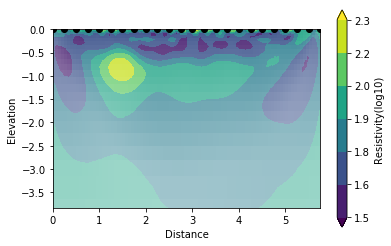

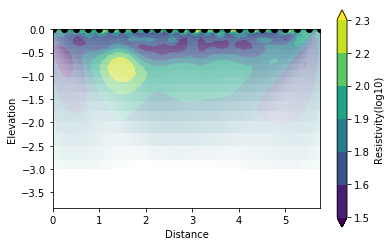

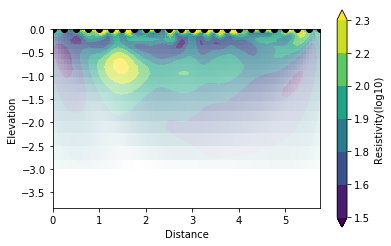

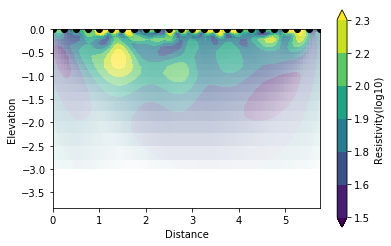

In [9]:
k.showResults(index=0, attr='Resistivity(log10)', contour=True, vmin=1.5, vmax=2.3)
k.showResults(index=1, attr='Resistivity(log10)', contour=True, vmin=1.5, vmax=2.3)
k.showResults(index=2, attr='Resistivity(log10)', contour=True, vmin=1.5, vmax=2.3)
k.showResults(index=3, attr='Resistivity(log10)', contour=True, vmin=1.5, vmax=2.3)

We can also look for the differences between each survey.

3.833333333333333
Mesh plotted in 0.14686 seconds
3.833333333333333
Mesh plotted in 0.15685 seconds
3.833333333333333
Mesh plotted in 0.13478 seconds


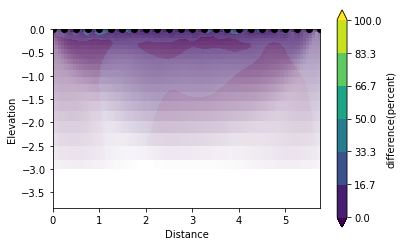

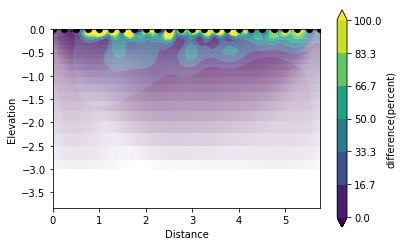

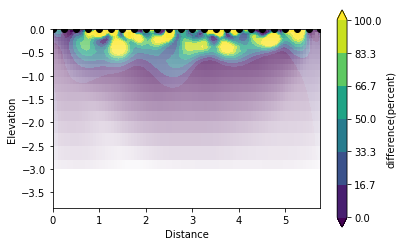

In [11]:
# the differnces are in percent in reference to the backround survey (index=0)
k.showResults(index=1, attr='difference(percent)', contour=True, vmin=0, vmax=100)
k.showResults(index=2, attr='difference(percent)', contour=True, vmin=0, vmax=100)
k.showResults(index=3, attr='difference(percent)', contour=True, vmin=0, vmax=100)

Like this we can observe a deeper positive change (drying) during the growth season of wheat mainly due to the root water uptake.